In [1]:
#Step 1: Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step 2: Download and create file

data = pd.read_csv('Telco_Churn_Data.csv')

In [3]:
#Step 3: Read file

data.head()

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [4]:
#Step 4: Check the length and shape

len(data)
data.shape

(4708, 15)

In [5]:
#Step 5: Rename the column

data.columns=data.columns.str.replace(' ','_')
data.head()

,Target_Churn,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Acct_Plan_Subtype,Complaint_Code,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [ ]:
#Step 6: Change the data type (Target_Code, Condition_of_Current_Handset,
# and Current_TechSupComplaints) from continuous to categorial type





In [9]:
#Step 7: Check for any missing values
#Explore the columns that have missing values
data.isnull().any()

Target_Churn                    False
Target_Code                     False
Current_Bill_Amt                False
Avg_Calls                       False
Avg_Calls_Weekdays              False
Account_Age                     False
Percent_Increase_MOM            False
Acct_Plan_Subtype               False
Complaint_Code                   True
Avg_Days_Delinquent             False
Current_TechSupComplaints       False
Current_Days_OpenWorkOrders     False
Equipment_Age                   False
Condition_of_Current_Handset     True
Avg_Hours_WorkOrderOpenned      False
dtype: bool

In [8]:
#Find out the total number of missing values
data.isnull().sum()

Target_Churn                      0
Target_Code                       0
Current_Bill_Amt                  0
Avg_Calls                         0
Avg_Calls_Weekdays                0
Account_Age                       0
Percent_Increase_MOM              0
Acct_Plan_Subtype                 0
Complaint_Code                    7
Avg_Days_Delinquent               0
Current_TechSupComplaints         0
Current_Days_OpenWorkOrders       0
Equipment_Age                     0
Condition_of_Current_Handset    444
Avg_Hours_WorkOrderOpenned        0
dtype: int64

In [10]:
#Find out the percentage of missing values
round(data.isnull().sum()/len(data)*100,2)

Target_Churn                    0.00
Target_Code                     0.00
Current_Bill_Amt                0.00
Avg_Calls                       0.00
Avg_Calls_Weekdays              0.00
Account_Age                     0.00
Percent_Increase_MOM            0.00
Acct_Plan_Subtype               0.00
Complaint_Code                  0.15
Avg_Days_Delinquent             0.00
Current_TechSupComplaints       0.00
Current_Days_OpenWorkOrders     0.00
Equipment_Age                   0.00
Condition_of_Current_Handset    9.43
Avg_Hours_WorkOrderOpenned      0.00
dtype: float64

In [11]:
#Check the data types of the missing columns:

data[["Complaint_Code","Condition_of_Current_Handset"]].dtypes

Complaint_Code                   object
Condition_of_Current_Handset    float64
dtype: object

In [12]:
#Condition_of_Current_Handset column: fill with mean of the data

mean_value = data['Condition_of_Current_Handset'].mean()
data['Condition_of_Current_Handset']=data['Condition_of_Current_Handset']\
.fillna(mean_value)

In [14]:
#Complaint_Code column

data['Complaint_Code'].value_counts()

Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Code, dtype: int64

In [15]:
#Complaint_Code column: Fill with the most frequently occuring entry

data['Complaint_Code'] = data['Complaint_Code'].fillna(data['Complaint_Code']\
                                      .value_counts().idxmax())

In [16]:
#Check whether the missing values have been imputed:

data.isnull().any()

Target_Churn                    False
Target_Code                     False
Current_Bill_Amt                False
Avg_Calls                       False
Avg_Calls_Weekdays              False
Account_Age                     False
Percent_Increase_MOM            False
Acct_Plan_Subtype               False
Complaint_Code                  False
Avg_Days_Delinquent             False
Current_TechSupComplaints       False
Current_Days_OpenWorkOrders     False
Equipment_Age                   False
Condition_of_Current_Handset    False
Avg_Hours_WorkOrderOpenned      False
dtype: bool

In [22]:
#Step 8: Perform data exploration (Target_Churn)

summary_churn = data.groupby('Target_Churn')
summary_churn.mean()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned
Target_Churn,,,,,,,,,,,,
Churn,1.0,20182.709226,9348.878298,37524.030899,25.418452,-0.281309,19.075339,0.459117,2.498907,11.191517,1.018272,0.960482
No Churn,0.0,19494.510120,9194.885309,38698.530221,26.704254,0.255769,9.144444,0.372986,2.382074,10.453119,1.020136,0.913846


,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned
Target_Code,1.000000,0.019995,0.007375,-0.014987,-0.089890,-0.059899,0.460092,0.045102,0.002891,0.042373,-0.006798,0.002611
Current_Bill_Amt,0.019995,1.000000,0.352535,0.428040,0.003292,-0.015588,0.024285,0.077102,0.076418,-0.040732,-0.007992,0.016852
Avg_Calls,0.007375,0.352535,1.000000,0.727226,-0.023758,-0.040899,0.019407,0.090759,0.078428,-0.099348,-0.013607,0.013441
Avg_Calls_Weekdays,-0.014987,0.428040,0.727226,1.000000,0.029957,-0.044496,0.017134,0.114104,0.065318,-0.103769,-0.029295,0.013577
Account_Age,-0.089890,0.003292,-0.023758,0.029957,1.000000,-0.004022,-0.047542,-0.019597,-0.026270,0.073503,-0.019536,0.005059
Percent_Increase_MOM,-0.059899,-0.015588,-0.040899,-0.044496,-0.004022,1.000000,0.049768,0.015301,-0.003013,-0.003819,-0.005750,-0.008848
Avg_Days_Delinquent,0.460092,0.024285,0.019407,0.017134,-0.047542,0.049768,1.000000,0.076716,-0.001686,0.014047,-0.006625,0.000168
Current_TechSupComplaints,0.045102,0.077102,0.090759,0.114104,-0.019597,0.015301,0.076716,1.000000,0.025433,-0.055560,-0.023546,0.226835
Current_Days_OpenWorkOrders,0.002891,0.076418,0.078428,0.065318,-0.026270,-0.003013,-0.001686,0.025433,1.000000,-0.037599,0.122347,0.029384
Equipment_Age,0.042373,-0.040732,-0.099348,-0.103769,0.073503,-0.003819,0.014047,-0.055560,-0.037599,1.000000,0.012299,-0.014347


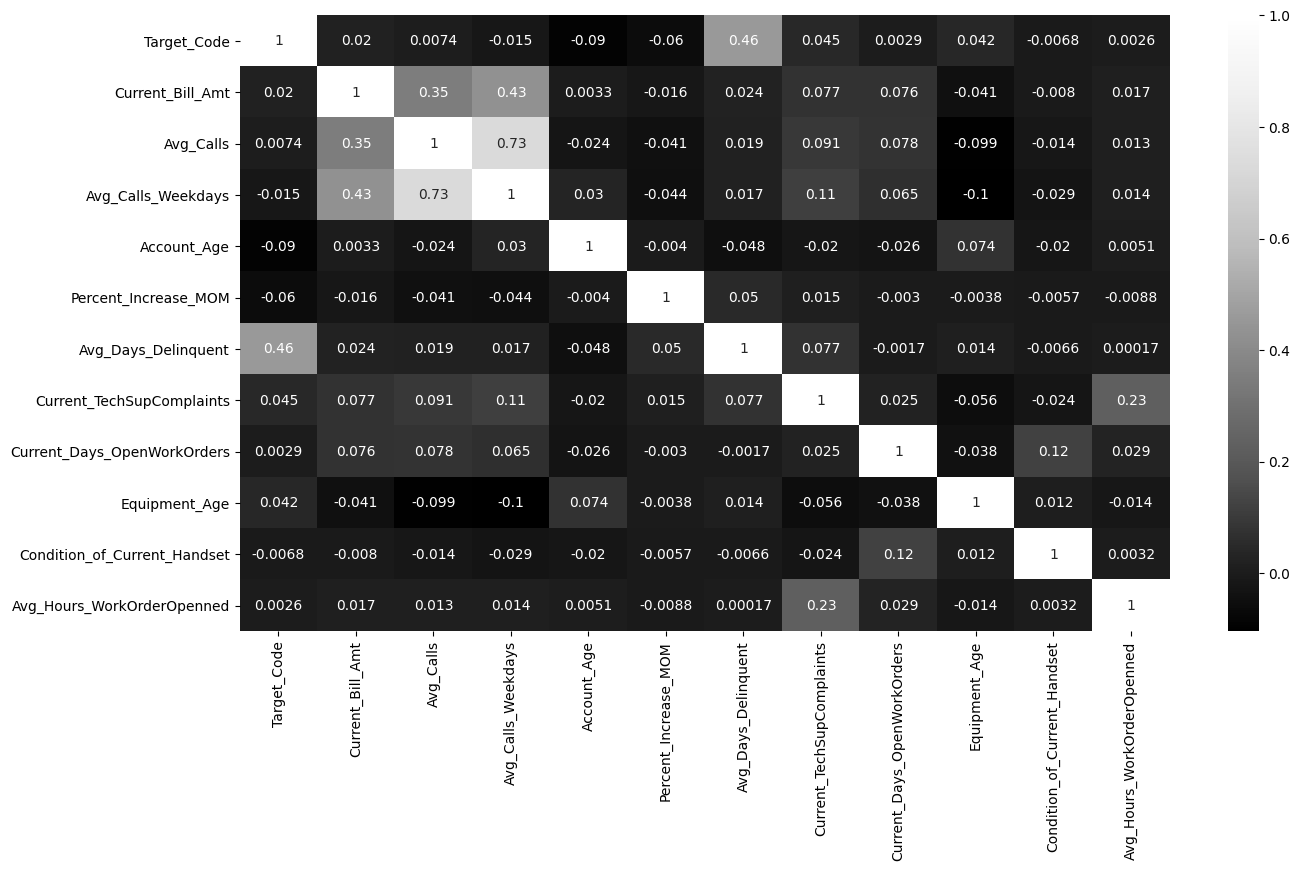

In [26]:
#Step 9: Find the correlation among different variables

corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,\
           xticklabels=corr.columns.values,\
           yticklabels=corr.columns.values,\
           annot=True, cmap='Greys_r')
corr

/Users/kate/opt/anaconda3/envs/ds-marketing/lib/python3.9/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/kate/opt/anaconda3/envs/ds-marketing/lib/python3.9/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/kate/opt/anaconda3/envs/ds-marketing/lib/python3.9/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'No of Customers')

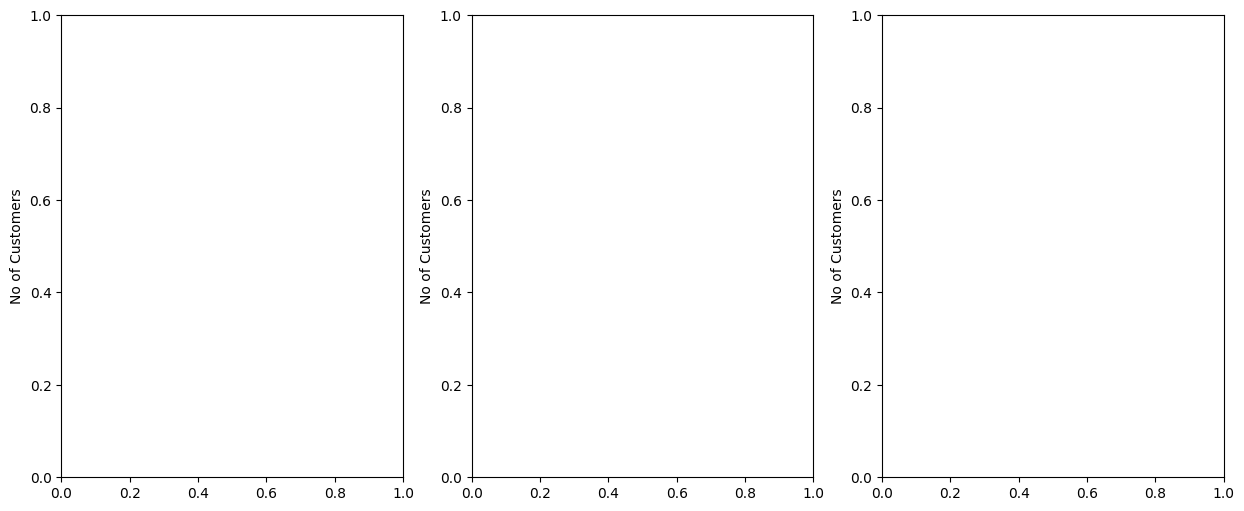

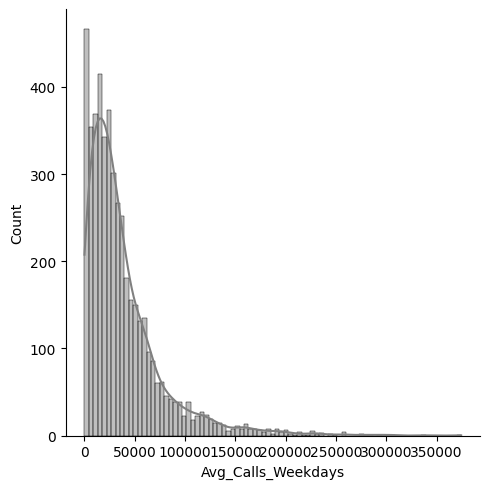

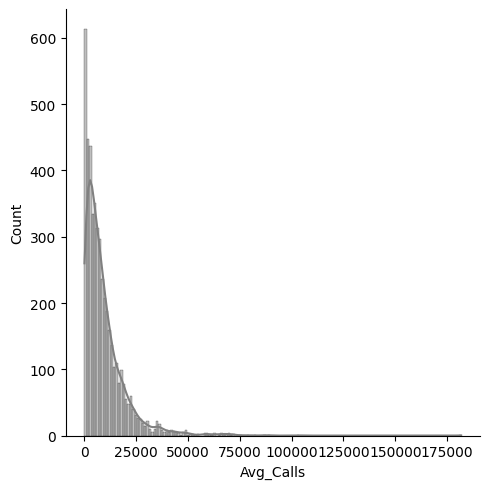

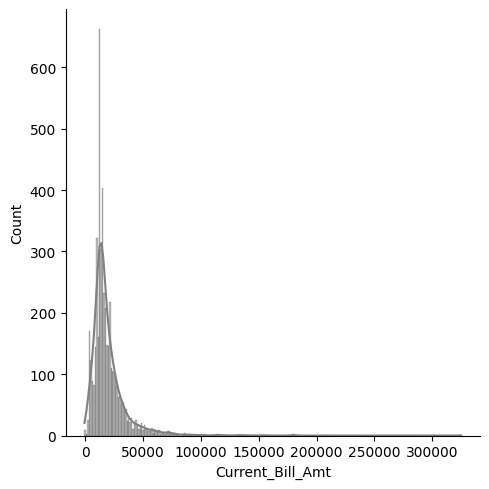

In [28]:
#Step 10: Perform univariate and bivariate analyses
#For the columns: Avg_Calls_Weekdays, Avg_Calls, Current_Bill_Amt

#Univariate analysis

f,axes = plt.subplots(ncols=3, figsize = (15,6))

sns.displot(data.Avg_Calls_Weekdays, kde=True, color = 'gray',\
            ax=axes[0], legend=False)

axes[0].set_ylabel('No of Customers')
sns.displot(data.Avg_Calls, kde=True, color = 'gray',\
            ax=axes[1], legend=False)

axes[1].set_ylabel('No of Customers')
sns.displot(data.Current_Bill_Amt, kde=True, color = 'gray',\
            ax=axes[2], legend=False)

axes[2].set_ylabel('No of Customers')

Text(0.5, 1.0, 'Customer Complain Code Distrobution')

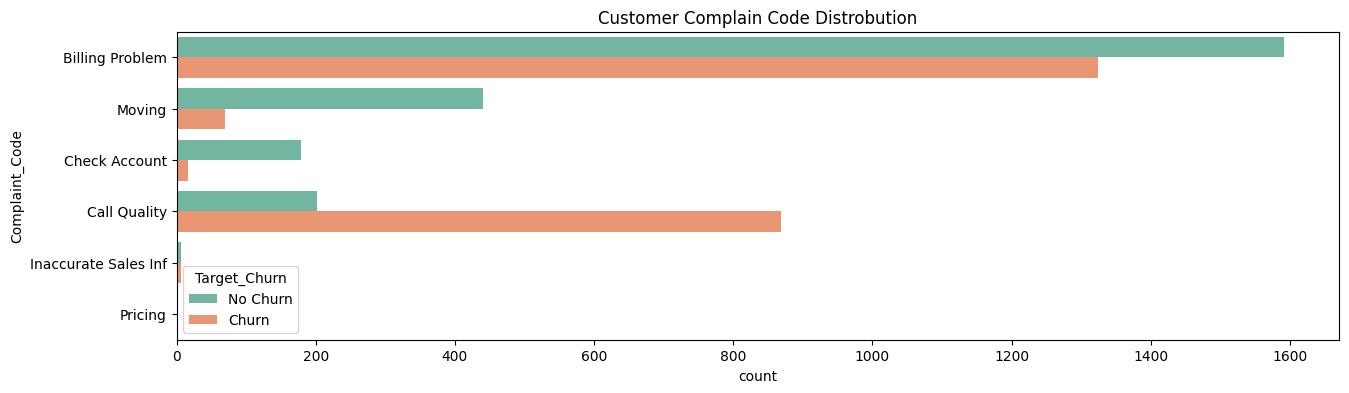

In [31]:
#Bivariate analysis (Complain_Code and Target_Churn)

plt.figure(figsize=(15,4))
p=sns.countplot(y='Complaint_Code', hue='Target_Churn',data=data,\
               palette = 'Set2')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Complain Code Distrobution')

Text(0.5, 1.0, 'Customer Acct_Plan_Subtype Distribution')

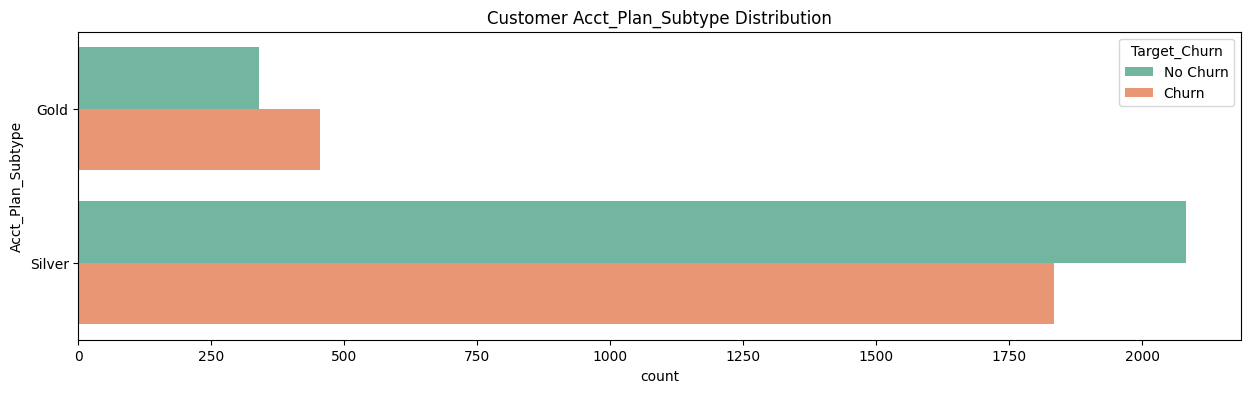

In [38]:
#Bivariate analysis (Acct_Plan_Subtype and Target_Churn)

plt.figure(figsize=(15,4))
p=sns.countplot(y='Acct_Plan_Subtype', hue='Target_Churn',data=data,\
               palette = 'Set2')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Acct_Plan_Subtype Distribution')

Text(0.5, 1.0, 'Customer Current_TechSupComplaints Distribution')

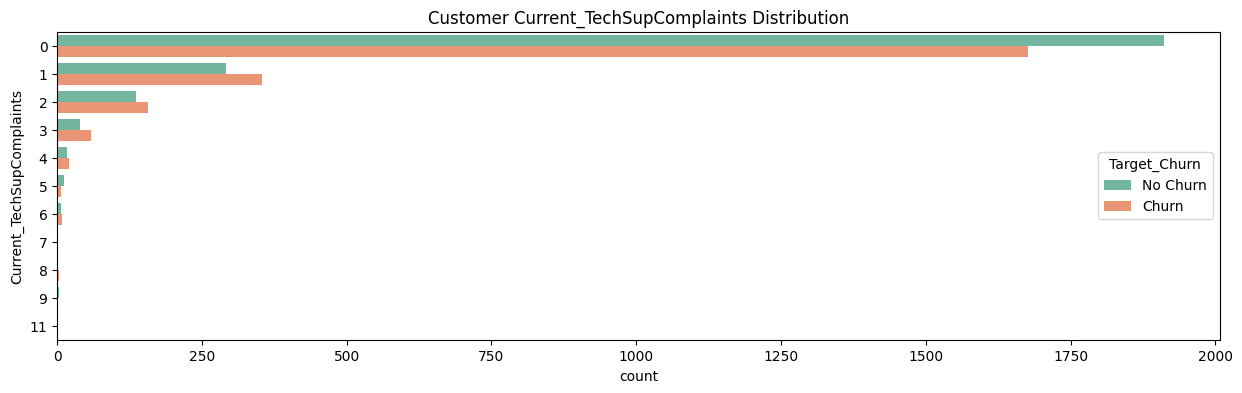

In [39]:
#Bivariate analysis (Current_TechSupComplaints and Target_Churn)

plt.figure(figsize=(15,4))
p=sns.countplot(y='Current_TechSupComplaints', hue='Target_Churn',data=data,\
               palette = 'Set2')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Current_TechSupComplaints Distribution')

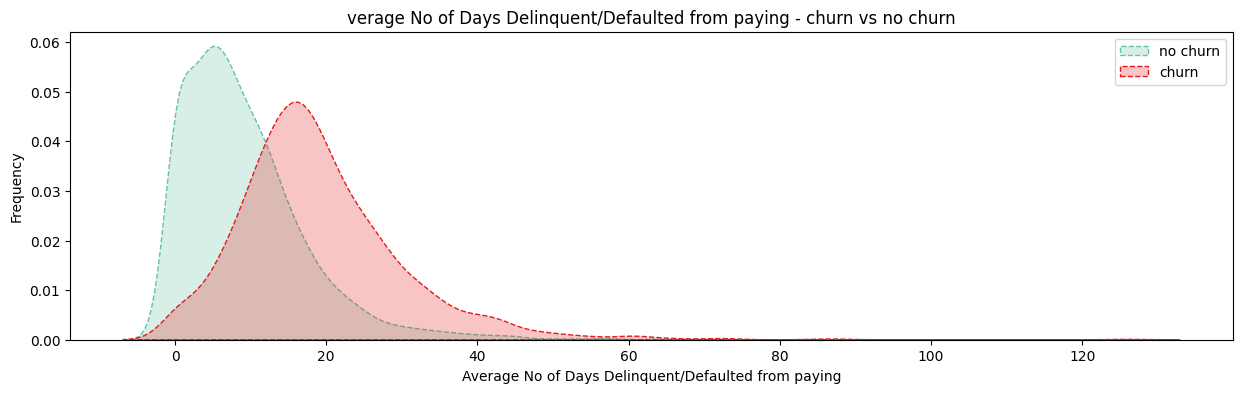

In [41]:
#Bivariate analysis (Avg_Days_Delinquent and Target_Code)

plt.figure(figsize=(15,4))
ax = sns.kdeplot(data.loc[(data['Target_Code'] == 0),'Avg_Days_Delinquent'],\
                         color=sns.color_palette("Set2")[0],\
                         shade = True, label = 'no churn',\
                         linestyle = '--')
ax = sns.kdeplot(data.loc[(data['Target_Code'] == 1),'Avg_Days_Delinquent'],\
                         color=sns.color_palette("Set1")[0],\
                         shade = True, label = 'churn',\
                         linestyle = '--')
ax.set(xlabel='Average No of Days Delinquent/Defaulted from paying', ylabel='Frequency')
plt.title('verage No of Days Delinquent/Defaulted from paying - churn vs no churn')
plt.legend()

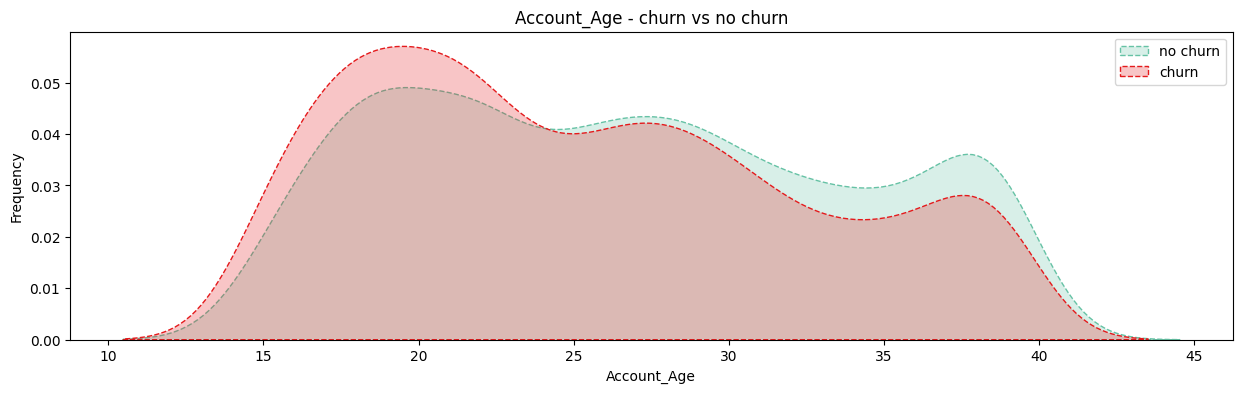

In [43]:
#Bivariate analysis (Account_Age and Target_Code)

plt.figure(figsize=(15,4))
ax = sns.kdeplot(data.loc[(data['Target_Code'] == 0),'Account_Age'],\
                         color=sns.color_palette("Set2")[0],\
                         shade = True, label = 'no churn',\
                         linestyle = '--')
ax = sns.kdeplot(data.loc[(data['Target_Code'] == 1),'Account_Age'],\
                         color=sns.color_palette("Set1")[0],\
                         shade = True, label = 'churn',\
                         linestyle = '--')
ax.set(xlabel='Account_Age', ylabel='Frequency')
plt.title('Account_Age - churn vs no churn')
plt.legend()

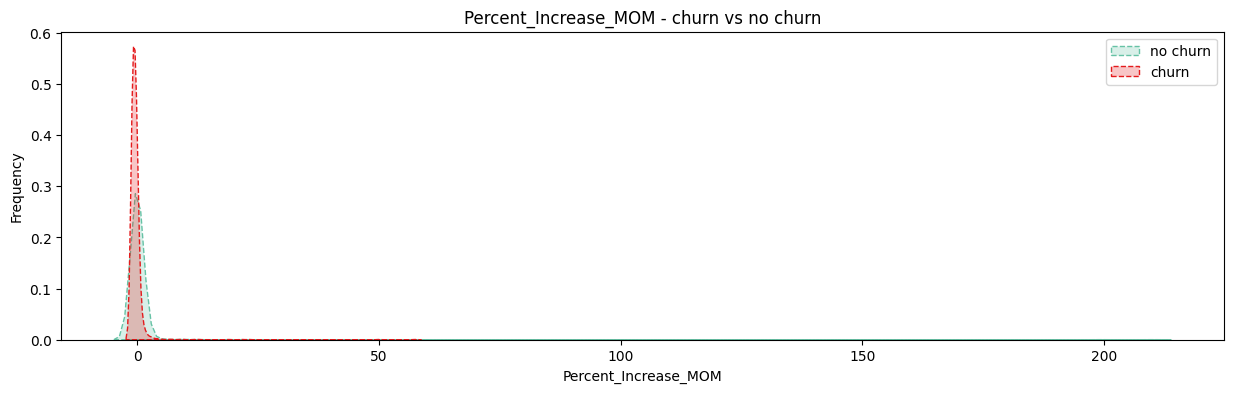

In [44]:
#Bivariate analysis (Percent_Increase_MOM and Target_Code)

plt.figure(figsize=(15,4))
ax = sns.kdeplot(data.loc[(data['Target_Code'] == 0),'Percent_Increase_MOM'],\
                         color=sns.color_palette("Set2")[0],\
                         shade = True, label = 'no churn',\
                         linestyle = '--')
ax = sns.kdeplot(data.loc[(data['Target_Code'] == 1),'Percent_Increase_MOM'],\
                         color=sns.color_palette("Set1")[0],\
                         shade = True, label = 'churn',\
                         linestyle = '--')
ax.set(xlabel='Percent_Increase_MOM', ylabel='Frequency')
plt.title('Percent_Increase_MOM - churn vs no churn')
plt.legend()

In [63]:
#Activity 7.02: Performing the MN technique from OSEMN

#Import the libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np


#Encode the Acct_Plan_Subtype and Complaint_Code column

data['Acct_Plan_Subtype'] = data['Acct_Plan_Subtype'].astype('category').cat.codes
data['Complaint_Code'] = data['Complaint_Code'].astype('category').cat.codes
data[['Acct_Plan_Subtype','Complaint_Code']].head()

,Acct_Plan_Subtype,Complaint_Code
0,0,0
1,1,4
2,0,0
3,1,0
4,0,0


In [64]:
#Split the data into training (80%) and testing sets(20%)

target = 'Target_Code'
X=data.drop(['Target_Code','Target_Churn'], axis=1)
y=data[target]
X_train, X_test, y_train, y_test = train_test_split\
(X,y, test_size=0.15,\
random_state=123,\
stratify=y)

In [65]:
##Perform feature selection using the random forest classifier

#Fit the model using the random forest classifier

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

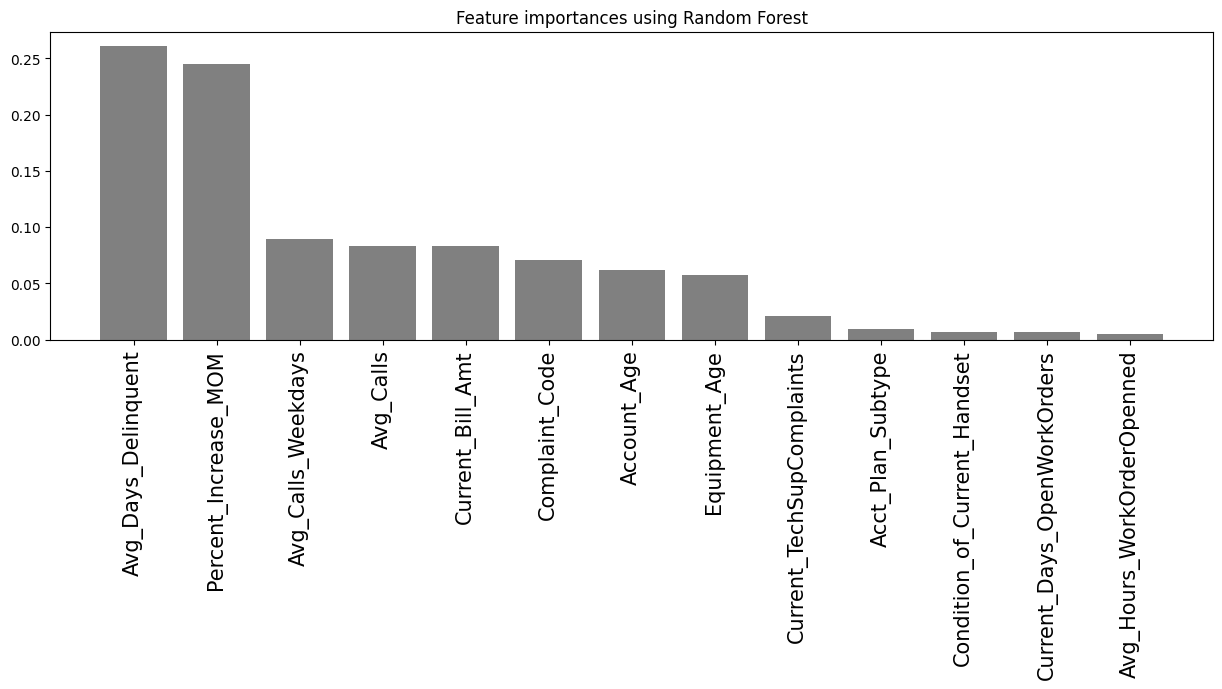

In [66]:
#Call the random forest feature_importances_ attribute to find the
#important features and store them

importances = forest.feature_importances_

#Create features variables and sort the important features
#Using NumPy's argsort function

features = data.drop(['Target_Churn','Target_Code'], axis=1).columns

indices=np.argsort(importances)[::-1]

#Plot the important features

plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],\
       color = 'gray', align='center')
plt.xticks(range(X_train.shape[1]), features[indices],\
          rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [67]:
#Select the top seven features and save in a variable named top7_features

feature_importance_df = pd.DataFrame({'Feature':features,\
                                     'Importance':importances})
print(feature_importance_df)

                         Feature  Importance
0               Current_Bill_Amt    0.082879
1                      Avg_Calls    0.083574
2             Avg_Calls_Weekdays    0.089095
3                    Account_Age    0.062077
4           Percent_Increase_MOM    0.245209
5              Acct_Plan_Subtype    0.009499
6                 Complaint_Code    0.070577
7            Avg_Days_Delinquent    0.260888
8      Current_TechSupComplaints    0.020659
9    Current_Days_OpenWorkOrders    0.006365
10                 Equipment_Age    0.057631
11  Condition_of_Current_Handset    0.007069
12    Avg_Hours_WorkOrderOpenned    0.004479


In [68]:
#Step: Building a Logistic Regression Model

import scipy.signal.signaltools

def _centered(arr, newsize):
    #Return the center newsize portion of the array
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) //2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range (len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

import statsmodels.api as sm

top7_features = ['Avg_Days_Delinquent','Percent_Increase_MOM',\
                'Avg_Calls_Weekdays','Avg_Calls',\
                'Current_Bill_Amt','Complaint_Code',\
                'Account_Age']

logReg = sm.Logit(y_train, X_train[top7_features])

logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.551146
         Iterations 8


In [69]:
#Obtain the summary and parameters

logistic_regression.summary
logistic_regression.params


Avg_Days_Delinquent     1.109226e-01
Percent_Increase_MOM   -3.922044e-01
Avg_Calls_Weekdays     -3.315366e-06
Avg_Calls              -1.817086e-06
Current_Bill_Amt       -2.385475e-07
Complaint_Code         -2.083688e-01
Account_Age            -4.794911e-02
dtype: float64

In [72]:
#Create a function to compute the coefficient

coef = logistic_regression.params
def y(coef,Avg_Days_Delinquent,Percent_Increase_MOM,Avg_Calls_Weekdays,\
     Avg_Calls,Current_Bill_Amt,Complaint_Code,Account_Age)\
: return coef[0]*Avg_Days_Delinquent+\
coef[1]*Percent_Increase_MOM+\
coef[2]*Avg_Calls_Weekdays+\
coef[3]*Avg_Calls+\
coef[4]*Current_Bill_Amt+\
coef[5]*Complaint_Code+\
coef[6]*Account_Age

In [73]:
#Compute customer churn

#Avg_Days_Delinquent: 40
#Percent_Increase_MOM: 5
#Avg_Calls_Weekdays: 39000
#Current_Bill_Amt: 12000
#Avg_Calls: 9000
#Complaint_Code: 0
#Account_Age: 17

import numpy as np
y1=y(coef,40,5,39000,12000,9000,0,17)
p=np.exp(y1)/(1+np.exp(y1))
p





0.818689786889436

In [74]:
##Additional: Calculate the accuracy of the function

#Implement scikit-learn's LogisticRegression module

from sklearn.linear_model import LogisticRegression

#Fit the model

clf = LogisticRegression(random_state=0, solver='lbfgs').\
fit(X_train[top7_features],y_train)

#Call the predict and predict_proba functions

clf.predict(X_test[top7_features])
clf.predict_proba(X_test[top7_features])

array([[0.53220974, 0.46779026],
       [0.56722271, 0.43277729],
       [0.02255051, 0.97744949],
       ...,
       [0.87470332, 0.12529668],
       [0.88841787, 0.11158213],
       [0.85917763, 0.14082237]])

In [75]:
#Calculate the accuracy of the function

clf.score(X_test[top7_features], y_test)

0.7454031117397454